# Simple OLS Debugging Notebook

Test out basic regression loss functions, link functions, and general BoostModel implementation using the implemented SimpleOLS weak learner as the booster. Each run below should result in decreasing loss over model iterations.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import scale
from sklearn.base import clone as clone_model

from genestboost import BoostedModel
from genestboost.weak_learners import SimpleOLS
from genestboost.link_functions import *
from genestboost.loss_functions import *

%matplotlib inline

### Create Fake Dataset for Regression

In [6]:
X, y = make_classification(n_samples=1000,
                           n_features=30,
                           n_informative=5,
                           random_state=0)
X = scale(X)

### Simple OLS weak learner implementation as the weak learner

In [10]:
lr_model = SimpleOLS()

### Test 1: Logit Link with Log Loss and Newton Weights

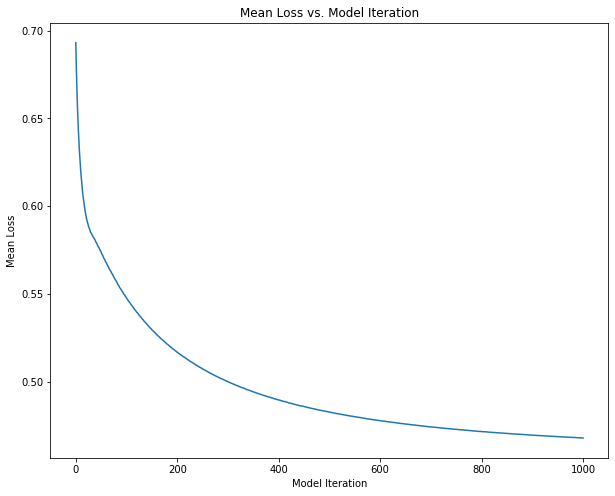

In [22]:
model = BoostedModel(link=LogitLink(),
                     loss=LogLoss(),
                     alpha=2.0,
                     weights="newton")
model.fit(X, y, lr_model, iterations=1000)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 2: Complementary Log Link with Least Squares Loss and Newton Weights

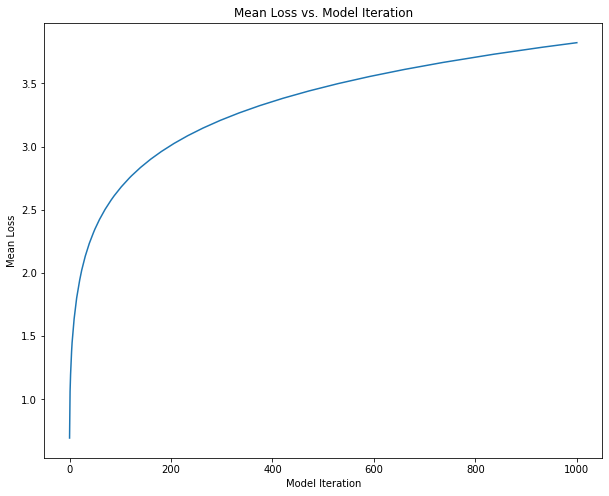

In [21]:
model = BoostedModel(link=CLogLogLink(),
                     loss=LogLoss(),
                     weights="newton",
                     alpha=2.0)
model.fit(X, y, lr_model, iterations=1000)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");